In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import copy

## Get Data

In [2]:
df_kend_train = pd.read_csv('./../dataset/kendaraan_train_clean_outlier.csv')
print("Total Data", len(df_kend_train))
df_kend_train.head()

Total Data 285633


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1.000000,0.153846,1.0,0.634615,1.0,0.5,1.000000,0.047251,0.932099,0.301038
1,0.000000,0.430769,1.0,0.750000,0.0,1.0,0.000000,0.043104,0.172840,0.512111
2,0.459542,0.015385,1.0,0.884615,1.0,0.5,1.000000,0.056002,0.981481,0.377163
3,1.000000,0.584615,1.0,0.923077,0.0,0.0,1.000000,0.000000,0.759259,0.183391
4,0.000000,0.461538,1.0,0.673077,0.0,1.0,0.495196,0.059953,0.537037,0.636678


## Select Attribute for Clustering

Text(0.5, 1.0, 'Korelasi Tiap Atribut')

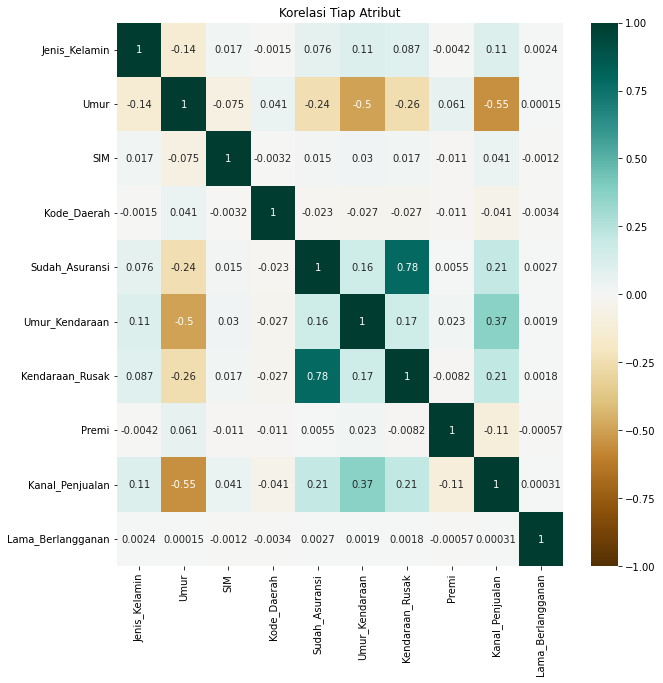

In [3]:
corr = df_kend_train.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Korelasi Tiap Atribut')

In [4]:
x = 'Umur'
y = 'Kanal_Penjualan'
# x = 'Umur'
# y = 'Premi'
df_kend_train =df_kend_train[[x, y]]
df = copy.deepcopy(df_kend_train)
df['Cluster'] = ""
df['Color'] = ""
df.head()

,Umur,Kanal_Penjualan,Cluster,Color
0,0.153846,0.932099,,
1,0.430769,0.172840,,
2,0.015385,0.981481,,
3,0.584615,0.759259,,
4,0.461538,0.537037,,


## Kmeans Function

### Initiate Centroid with Random Value

In [5]:
def initialCentroid(k, x, y, df):  
  randValue = {}
  for i in range(k):
    randValue[i] = [df[x][random.randint(0, len(df))], df[y][random.randint(0, len(df))]]
  print("rand: ", randValue)
  return randValue

### Calculate Distance Using Euclidean

In [6]:
def calcEuclidean(a, b):
  return math.sqrt((a[0]-b[0])**2 + (a[1] - b[1])**2)

def calcDist(df, centroids):
  colors = ['blue','orange','brown','red','olive','green','pink','grey','purple','cyan','gray']  
  dftmp = df.copy()  
  clus = []
  color = []
  for data in df.index:    
    dist = []
    rowData = [df[x][data], df[y][data]]
    for centroid in centroids:
      dist.append(calcEuclidean(rowData, centroids[centroid]))            
    clusIdx = dist.index(min(dist))
    clus.append(clusIdx)
    color.append(colors[clusIdx])    
  dftmp['Cluster'] = clus
  dftmp['Color'] = color
  return dftmp

### Set New Centroid

In [7]:
def setCentroid(centroids, x, y, df):
  for i in centroids.keys():    
    centroids[i][0] = np.mean(df.loc[df['Cluster']==i, x])
    centroids[i][1] = np.mean(df.loc[df['Cluster']==i, y])
  return centroids

### Main Function KMeans

In [8]:
def kMeans(k, x, y, df):      
  centroid = initialCentroid(k, x, y, df)  
  same = False
  i = 0    
  while(same == False):    
    old_centroid = copy.deepcopy(centroid)    
    df = calcDist(df, centroid)    
    centroid = setCentroid(centroid, x, y, df)            
    print('iterasi ke-', i)
    print('Centroid Sekarang:')
    for key in centroid.keys():
      print(key, ': ', centroid.get(key))
    if (old_centroid == centroid):
      print('amsu')
      same = True    
    i+=1
  print('Perulangan ke', i-1)
  print('Hasil Akhir Centroid:')
  for key in centroid.keys():
    print(key, ': ', centroid.get(key))      
  return centroid, df

## Make Cluster Visualisation Function

In [9]:
def visualisasi_cluster(df, x, y, centroid):
  plt.figure(figsize=(6,6))
  plt.title('Visualisasi Hasil Clustering')
  plt.scatter(df[x], df[y], color=df['Color'], alpha=0.5)
  for i in range(k):
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='p',s=200)

  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

## Proses Clustering with 3 total cluster

In [10]:
k = 2
centroid, df_hasil = kMeans(k, x, y, df)
df_hasil

rand:  {0: [0.0615384615384615, 0.3641975308641975], 1: [0.0307692307692307, 0.7592592592592592]}
iterasi ke- 0
Centroid Sekarang:
0 :  [0.4697764440755514, 0.15277964497843852]
1 :  [0.22757016735264243, 0.8700011075724287]
iterasi ke- 1
Centroid Sekarang:
0 :  [0.471073915468044, 0.15306994819158048]
1 :  [0.22712475011280311, 0.8698868980378819]
iterasi ke- 2
Centroid Sekarang:
0 :  [0.47136037036347256, 0.15346040611640965]
1 :  [0.22696317398338037, 0.8699339096252287]
iterasi ke- 3
Centroid Sekarang:
0 :  [0.47136037036347256, 0.15346040611640965]
1 :  [0.22696317398338037, 0.8699339096252287]
amsu
Perulangan ke 3
Hasil Akhir Centroid:
0 :  [0.47136037036347256, 0.15346040611640965]
1 :  [0.22696317398338037, 0.8699339096252287]


,Umur,Kanal_Penjualan,Cluster,Color
0,0.153846,0.932099,1,orange
1,0.430769,0.172840,0,blue
2,0.015385,0.981481,1,orange
3,0.584615,0.759259,1,orange
4,0.461538,0.537037,0,blue
...,...,...,...,...
285628,0.046154,0.932099,1,orange
285629,0.015385,0.932099,1,orange
285630,0.046154,0.932099,1,orange
285631,0.738462,0.759259,1,orange


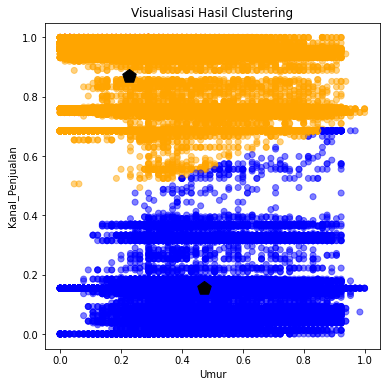

In [11]:
visualisasi_cluster(df_hasil, x, y, centroid)

## Evaluasi Model

### Elbow Method

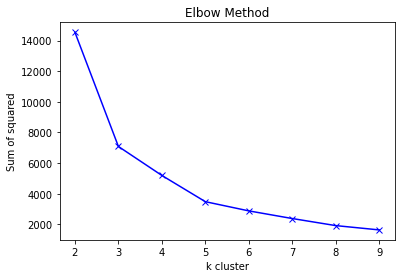

In [12]:
wcss = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_kend_train)
    wcss.append(km.inertia_)

plt.plot(K, wcss, 'bx-')
plt.xlabel('k cluster')
plt.ylabel('Sum of squared')
plt.title('Elbow Method')
plt.show()

### Silhouette Analysis

In [17]:
n_clusters = [2,3,4]
for i,k in enumerate(n_clusters):        
  km = KMeans(n_clusters=k)
  predict = km.fit_predict(df_kend_train)
  score = silhouette_score(df_kend_train, predict, metric="euclidean")
  print("For ", k, "n_clusters silhouette score is ", score)

For  2 n_clusters silhouette score is  0.6664914437975199
For  3 n_clusters silhouette score is  0.6137845756938419
For  4 n_clusters silhouette score is  0.5842588105992723


## Eksperimen

### Test Jumlah Cluster Berdasarkan Evaluasi

rand:  {0: [0.0769230769230769, 0.95679012345679], 1: [0.0769230769230769, 0.1543209876543209], 2: [0.2923076923076924, 0.3641975308641975]}
iterasi ke- 0
Centroid Sekarang:
0 :  [0.16766026502296316, 0.8920885186110125]
1 :  [0.1995098186939055, 0.12454692359055412]
2 :  [0.5403024920762908, 0.34826674824608134]
iterasi ke- 1
Centroid Sekarang:
0 :  [0.18546083513210068, 0.8812137693078246]
1 :  [0.30142061455731733, 0.14278440737260334]
2 :  [0.6330119630859762, 0.33766308361742203]
iterasi ke- 2
Centroid Sekarang:
0 :  [0.1899720595432887, 0.8792742279386058]
1 :  [0.3476017819346524, 0.1475971261651441]
2 :  [0.6907312395976554, 0.36909985888252705]
iterasi ke- 3
Centroid Sekarang:
0 :  [0.1872962948619133, 0.8796585761542582]
1 :  [0.3774695716837869, 0.14870647878412147]
2 :  [0.7203041795632316, 0.43089563551142407]
iterasi ke- 4
Centroid Sekarang:
0 :  [0.18145846542995955, 0.8807858481406678]
1 :  [0.39965655943444617, 0.14850043230611387]
2 :  [0.7246738282922, 0.506185071033

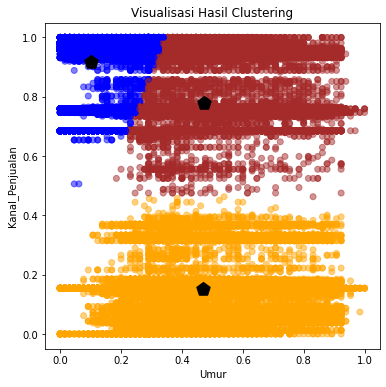

In [14]:
k = 3
centroid, df_hasil = kMeans(k, x, y, df)
visualisasi_cluster(df_hasil, x, y, centroid)